<a href="https://colab.research.google.com/github/pasidhu89/citrusApp/blob/fruit_model/fruitModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Oct 30 16:31:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 7.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.20GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="W53Hlw4puGia66J0OXuj")
project = rf.workspace("wasana").project("canker-fruit")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.203, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to canker-fruit-1 in yolov8:: 100%|██████████| 1020/1020 [00:00<00:00, 5881.75it/s]


In [5]:


!yolo task=detect mode=train model=yolov8m.pt data=/content/canker-fruit-1/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 342MB/s]
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/canker-fruit-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, bo

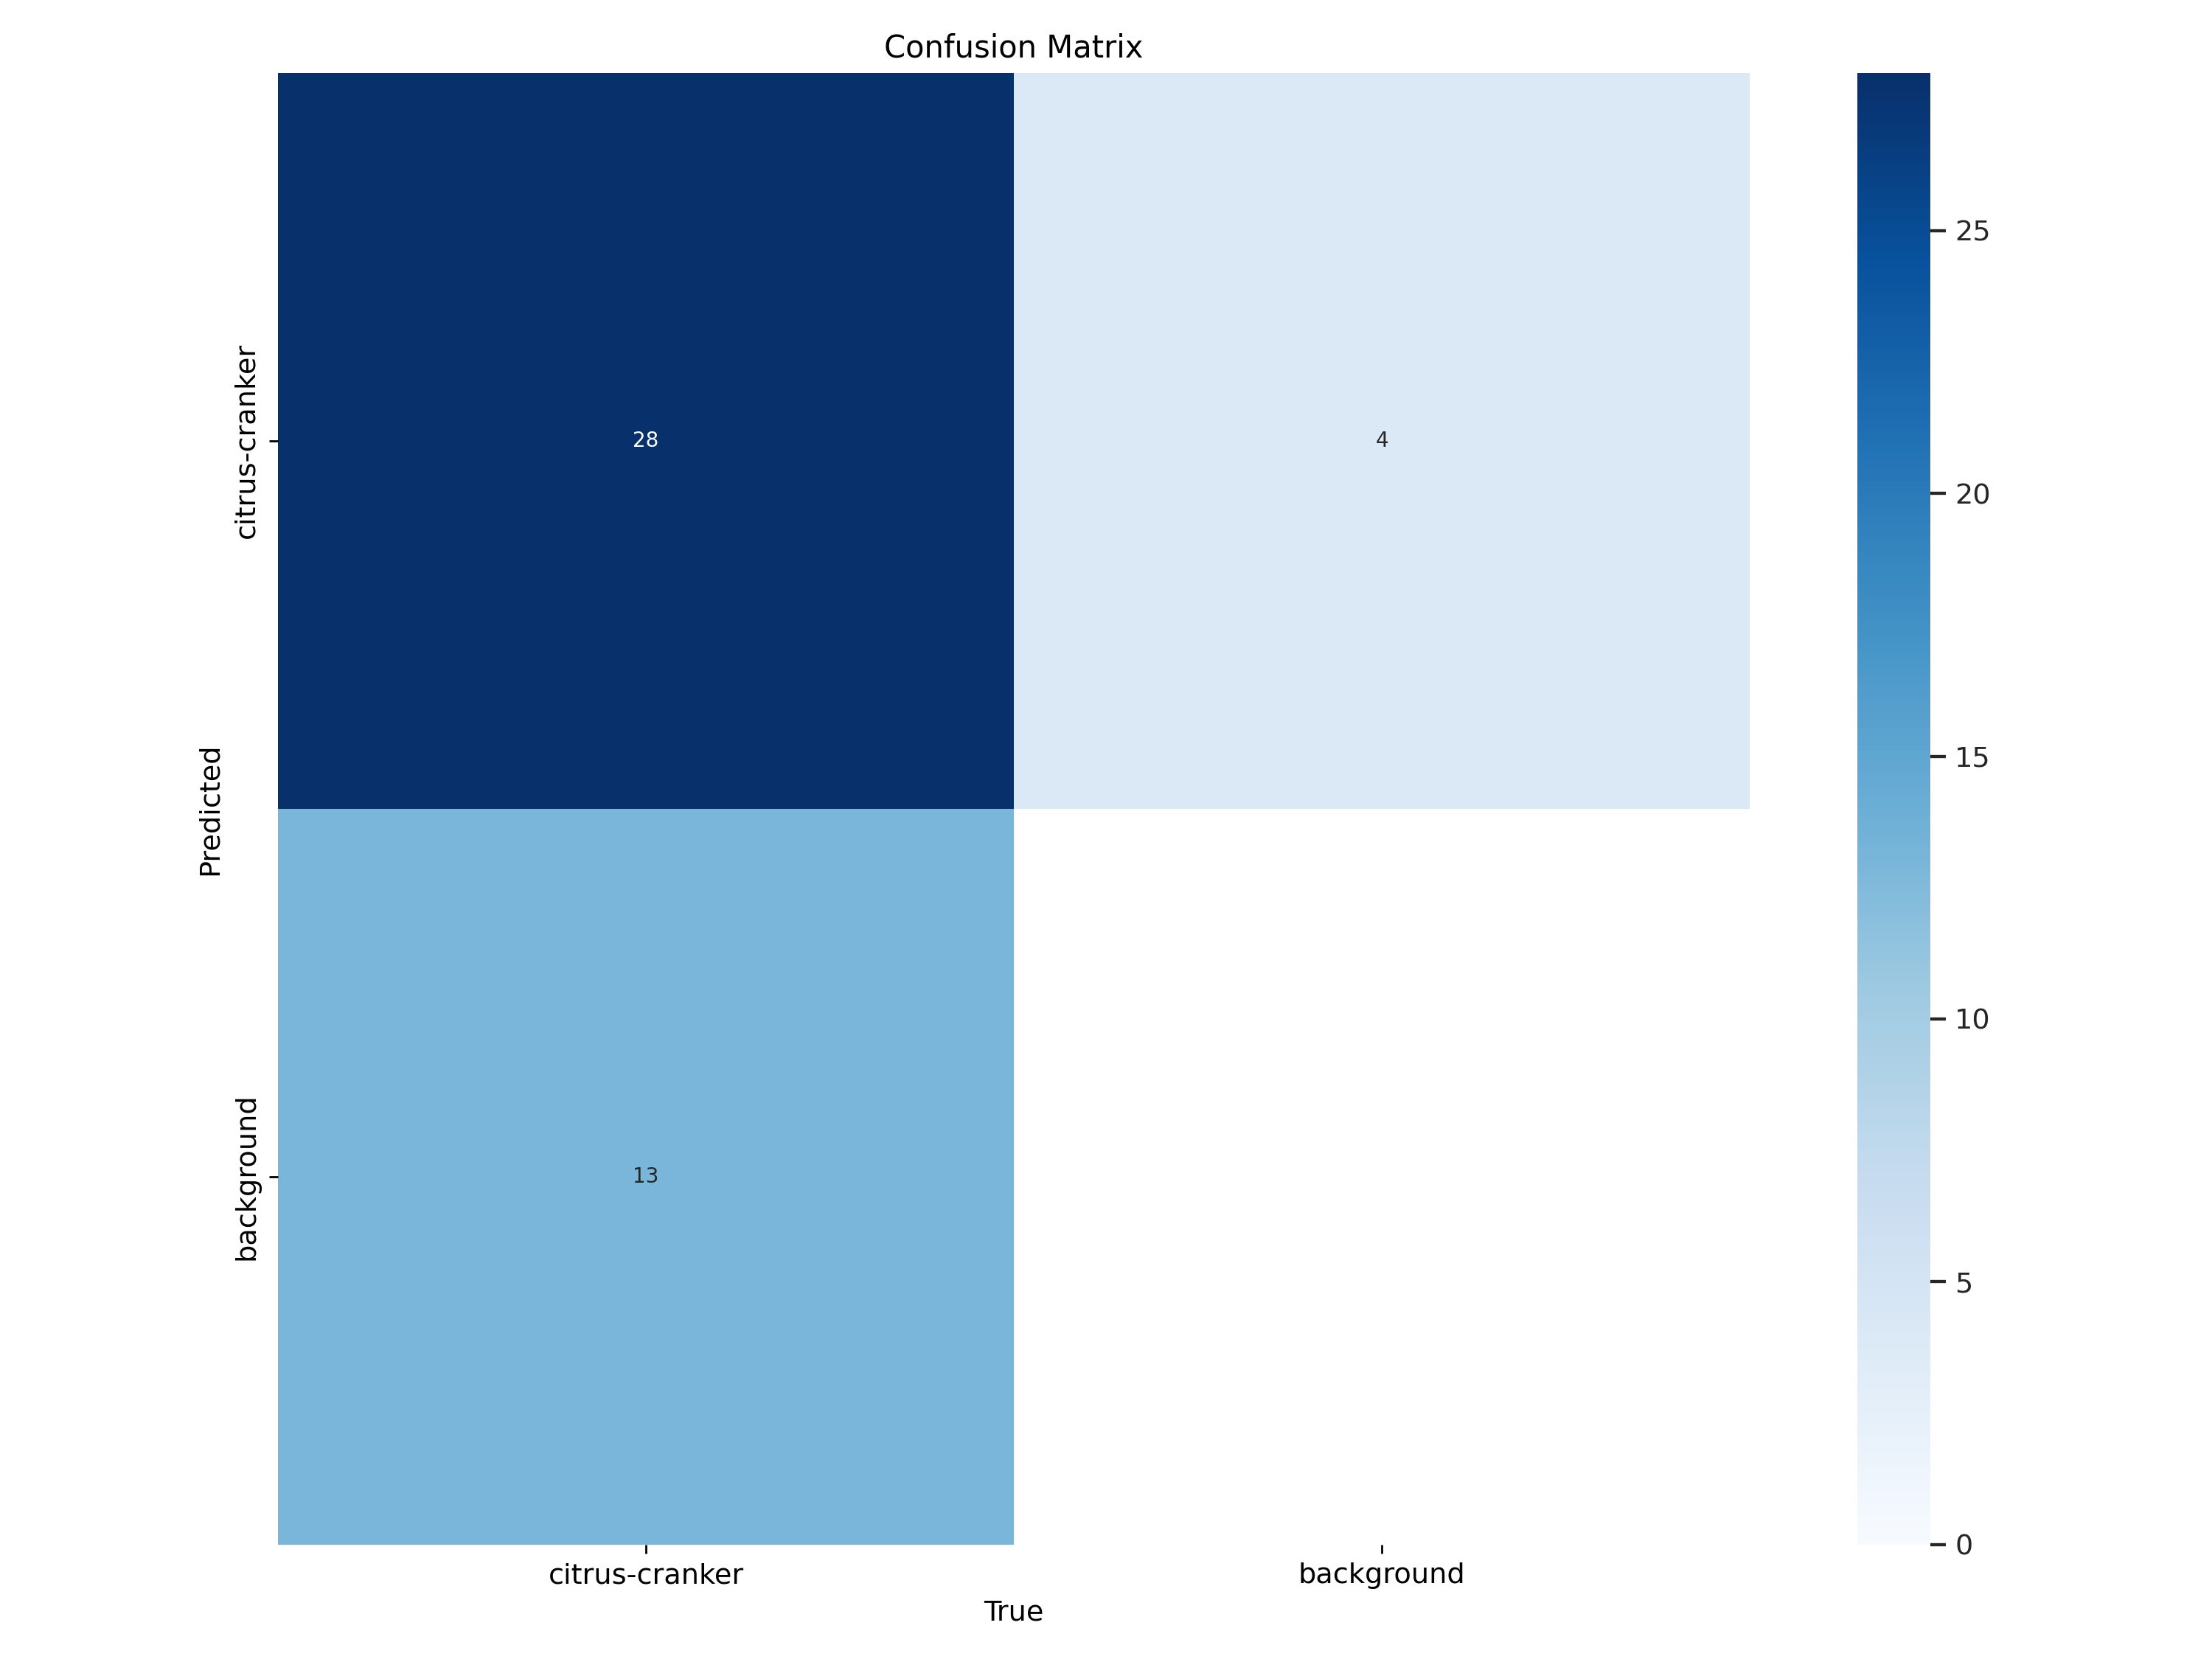

In [6]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width = 600)

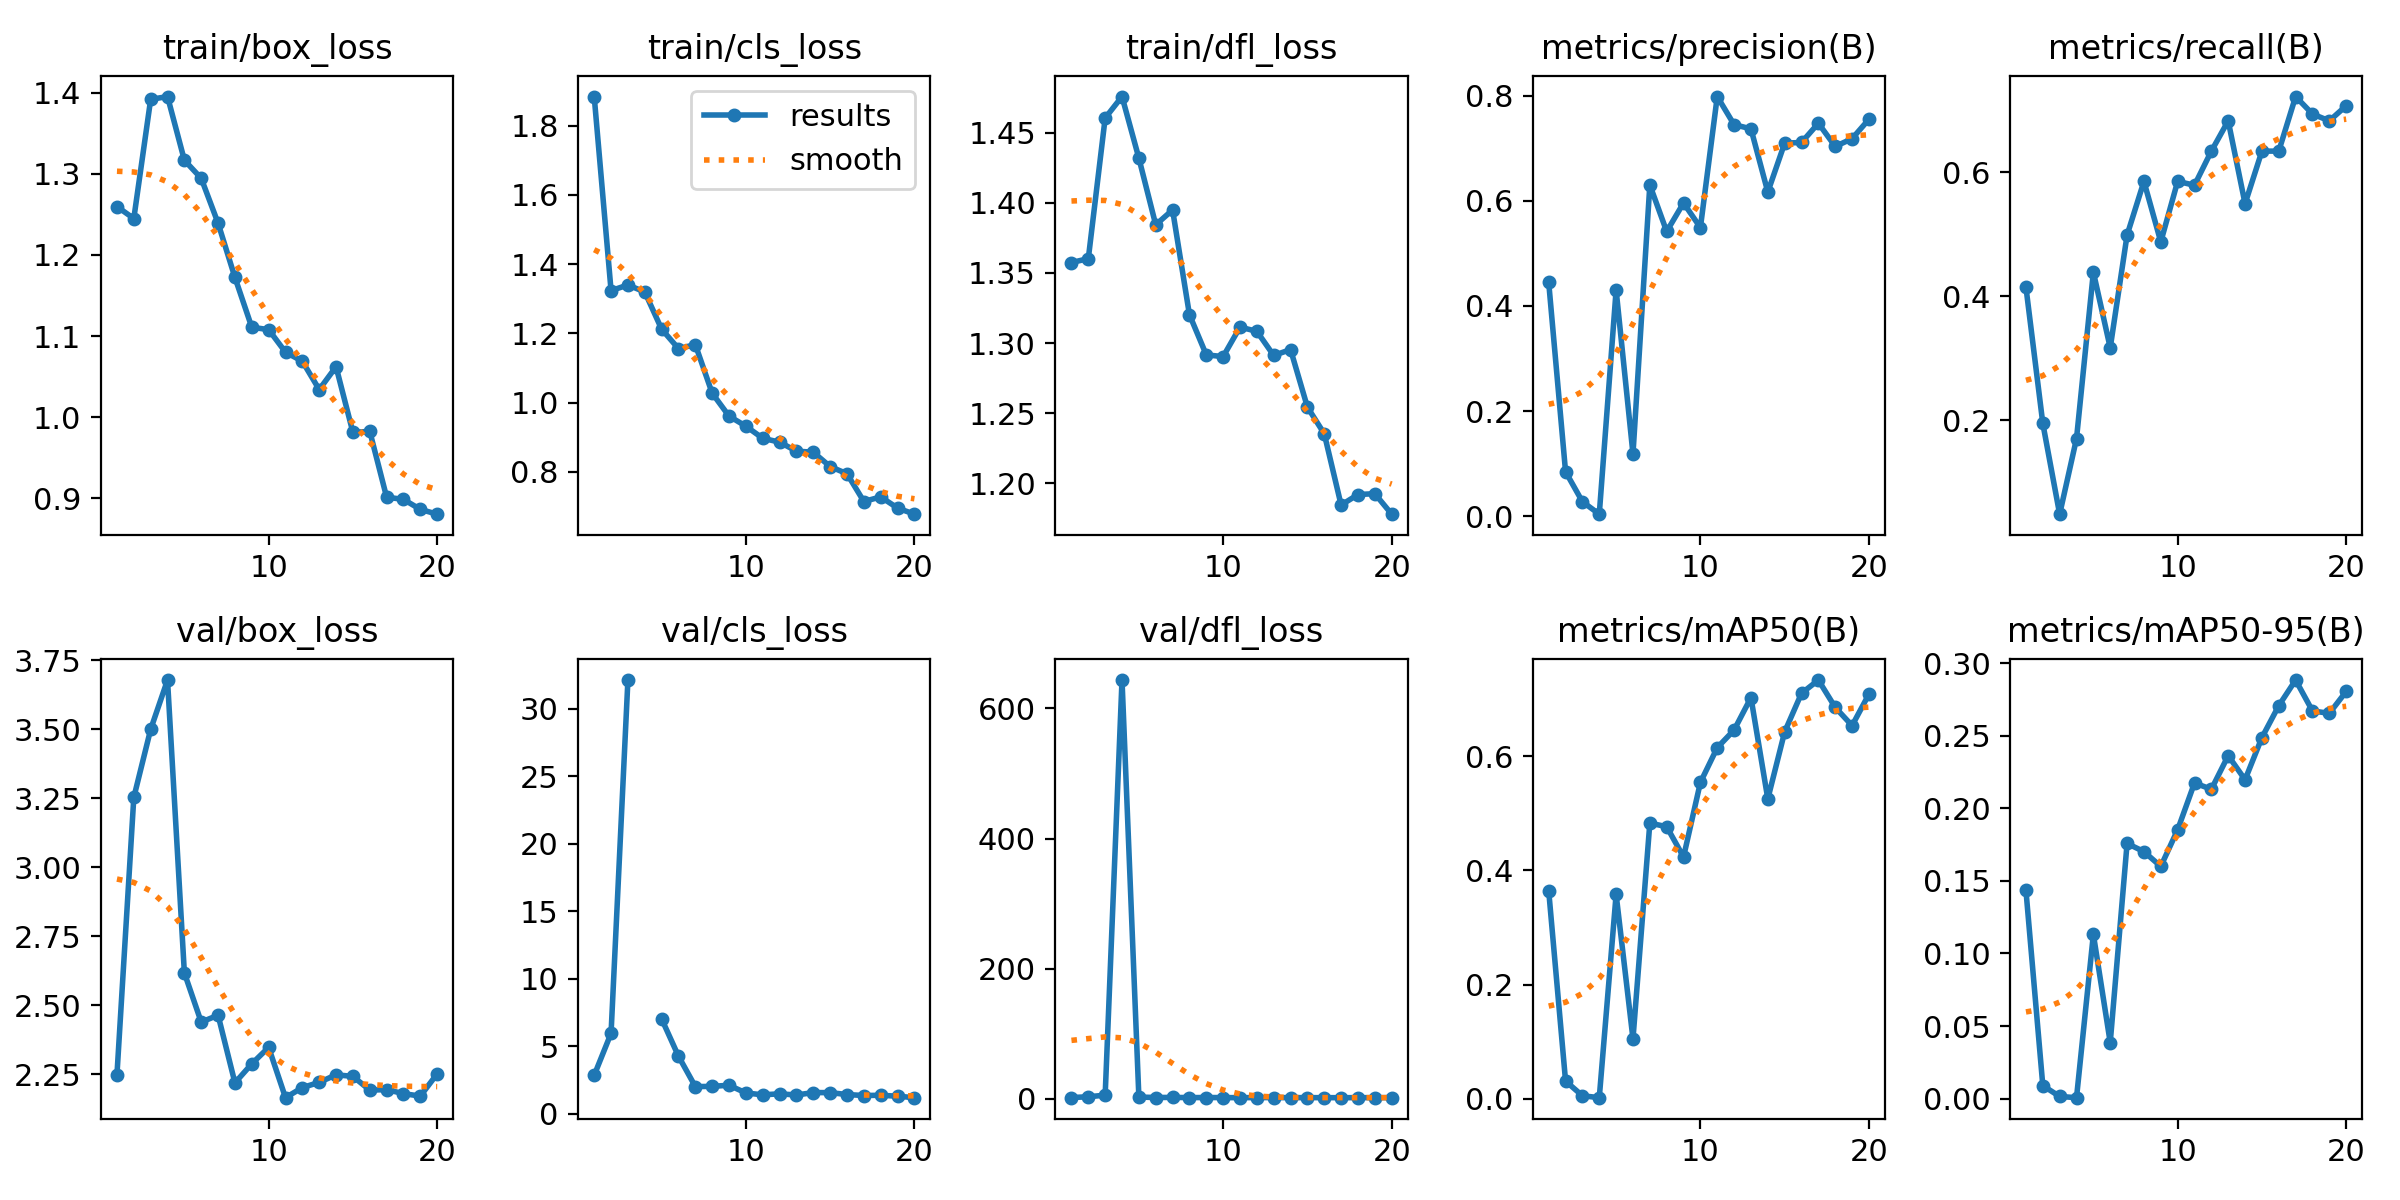

In [7]:
Image(filename=f'/content/runs/detect/train/results.png', width = 600)

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/canker-fruit-1/data.yaml

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/canker-fruit-1/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100% 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.23it/s]
                   all         16         41      0.748      0.722      0.733      0.288
Speed: 0.6ms preprocess, 24.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/canker-fruit-1/test/images save=True

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/16 /content/canker-fruit-1/test/images/canker-107-_jpg.rf.311385dfc012b9730aa18551879a8e7d.jpg: 640x640 (no detections), 36.9ms
image 2/16 /content/canker-fruit-1/test/images/canker-117-_jpg.rf.7f3fc2da3c65f448fa9e267d130913e3.jpg: 640x640 4 citrus-crankers, 34.2ms
image 3/16 /content/canker-fruit-1/test/images/canker-13-_jpg.rf.447c3d9857e96134ce42717c83af4f7c.jpg: 640x640 1 citrus-cranker, 30.9ms
image 4/16 /content/canker-fruit-1/test/images/canker-133-_jpg.rf.8fb576f1a8423df81d2e409b3785c051.jpg: 640x640 (no detections), 30.9ms
image 5/16 /content/canker-fruit-1/test/images/canker-138-_jpg.rf.69d1afa511c82c40b2a3d69f0e4e4993.jpg: 640x640 (no detections), 30.9ms
image 6/16 /content/canker-fruit-1/test/images/canker-164-_jpg.rf.fbe4e7e1e6e139496026e072866e7194.jpg: 640x640 6 citrus-crankers, 25.9ms
image 7/16